In [1]:
# этот ноутбуук есть частью проекта по модулю 4 "Компьютер говорит нет"
# ноутбук используется только для визуализации дата-сета, сама разработка модели выполняется в другом файле
import pandas as pd
import numpy as np
import datetime as dt
pd.set_option('display.max_columns', None)

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings; warnings.simplefilter('ignore')
sns.set()

In [2]:
bank_set = pd.read_csv(r"C:\STUDY\SkillFactory\Module_4\Kaggle\train.csv", parse_dates=['app_date'])

# сгруппируем колонки по типам. мне понравился такой подход. удобно
cat_columns = ['education', 'bki_request_cnt', 'home_address', 
                        'work_address', 'first_time', 'sna']
bin_columns = ['sex', 'car', 'car_type', 'good_work','foreign_passport']
num_columns = ['age', 'score_bki', 'bki_request_cnt', 'income', 'decline_app_cnt']

# сразу удалим client_id чтобы не мешался
bank_set.drop('client_id', axis=1, inplace=True)

In [3]:
def bin_labeling(data_set, columns_list):
    for column in columns_list:
        data_set[column] = LabelEncoder().fit_transform(data_set[column])
    return data_set

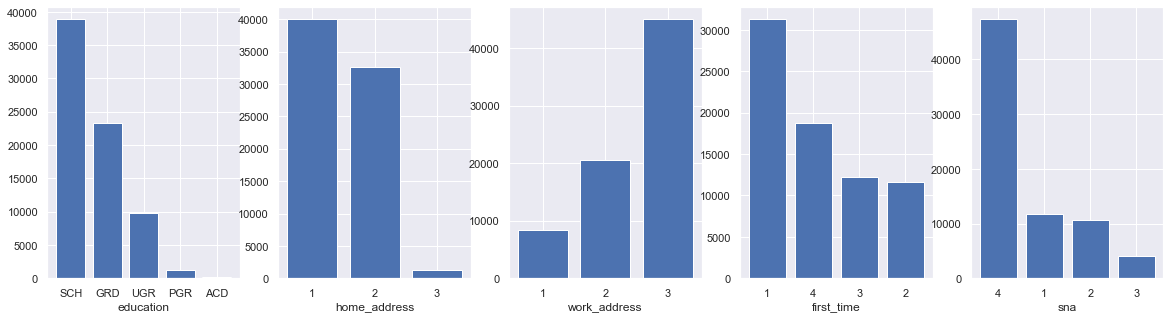

In [4]:
# рассмотрим распределение категориальных признаков 
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1,5,1)
ax2 = fig.add_subplot(1,5,2)
ax3 = fig.add_subplot(1,5,3)
ax4 = fig.add_subplot(1,5,4)
ax5 = fig.add_subplot(1,5,5)
ax1.bar(x = ['SCH', 'GRD', 'UGR' ,'PGR', 'ACD'], height = bank_set['education'].dropna().value_counts())
ax1.set_xlabel('education')
ax2.bar(x = bank_set['home_address'].unique().astype('str'), height = bank_set['home_address'].value_counts())
ax2.set_xlabel('home_address')
ax3.bar(x = np.sort(bank_set['work_address'].unique()).astype('str'), height = np.sort(bank_set['work_address'].value_counts()))
ax3.set_xlabel('work_address')
ax4.bar(x = bank_set['first_time'].unique().astype('str'), height = bank_set['first_time'].value_counts())
ax4.set_xlabel('first_time')
ax5.bar(x = bank_set['sna'].unique().astype('str'), height = bank_set['sna'].value_counts())
ax5.set_xlabel('sna')
plt.show()

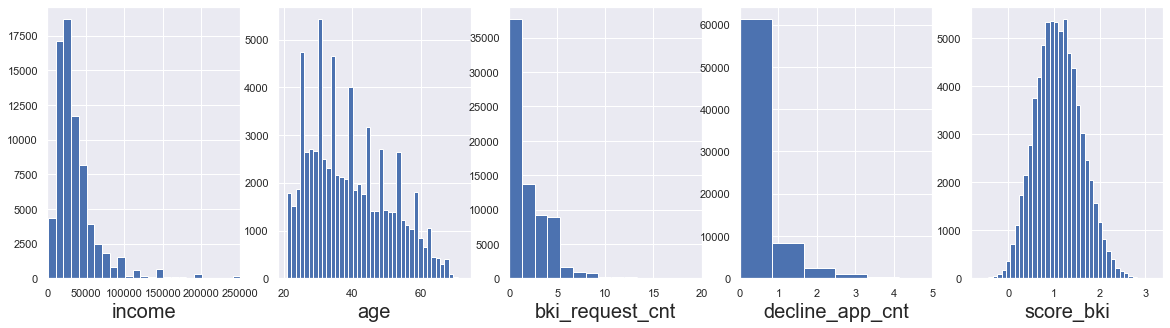

In [5]:
# рассмотрим распределение непрерывных признаков 
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1,5,1)
ax2 = fig.add_subplot(1,5,2)
ax3 = fig.add_subplot(1,5,3)
ax4 = fig.add_subplot(1,5,4)
ax5 = fig.add_subplot(1,5,5)
labels = [0,1]

ax1.hist(bank_set['income'], bins=100)
ax1.set_xlabel('income', fontsize=20)
ax1.set_xlim(0,250000)
ax2.hist(bank_set['age'], bins=40)
ax2.set_xlabel('age', fontsize=20)
ax3.hist(bank_set['bki_request_cnt'], bins=40)
ax3.set_xlabel('bki_request_cnt', fontsize=20)
ax3.set_xlim(0,20)
ax4.hist(bank_set['decline_app_cnt'], bins=40)
ax4.set_xlabel('decline_app_cnt', fontsize=20)
ax4.set_xlim(0,5)
ax5.hist(list(map(lambda item: item+3,bank_set['score_bki'])), bins=40)
ax5.set_xlabel('score_bki', fontsize=20)
#ax5.set_xlim(0,5)

plt.show()


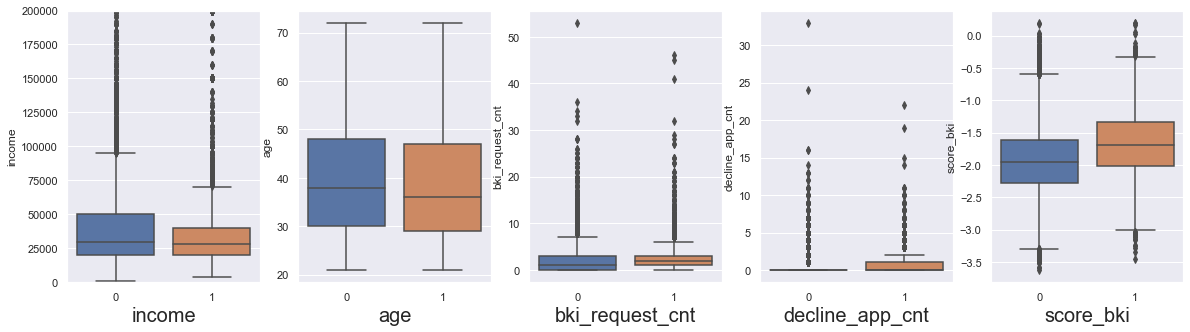

In [6]:
# рассмотрим распределение непрерывных признаков 
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1,5,1)
ax1.set_ylim(0, 200000)
ax2 = fig.add_subplot(1,5,2)
ax3 = fig.add_subplot(1,5,3)
ax4 = fig.add_subplot(1,5,4)
ax5 = fig.add_subplot(1,5,5)

sns.boxplot(x=bank_set['default'], y=bank_set['income'] ,ax=ax1)
ax1.set_xlabel('income', fontsize=20)
sns.boxplot(x=bank_set['default'], y=bank_set['age'], ax=ax2)
ax2.set_xlabel('age', fontsize=20)
sns.boxplot(x=bank_set['default'], y=bank_set['bki_request_cnt'],  ax=ax3)
ax3.set_xlabel('bki_request_cnt', fontsize=20)
sns.boxplot(x=bank_set['default'], y=bank_set['decline_app_cnt'],  ax=ax4)
ax4.set_xlabel('decline_app_cnt', fontsize=20)
sns.boxplot(x=bank_set['default'], y=bank_set['score_bki'],  ax=ax5)
ax5.set_xlabel('score_bki', fontsize=20)
plt.show()

In [7]:
# надо поработать с выбросами. Учитывая дисбаланс выборки нам даже надо избавиться от этого мусора

In [8]:
# тут преобразуем поле app_date для возможности анализа
bank_set['days_past'] = list(map(lambda item: (pd.Timestamp(dt.date.today()) - item).days
                                 , bank_set['app_date']))
bank_set.drop('app_date', axis=1, inplace=True)

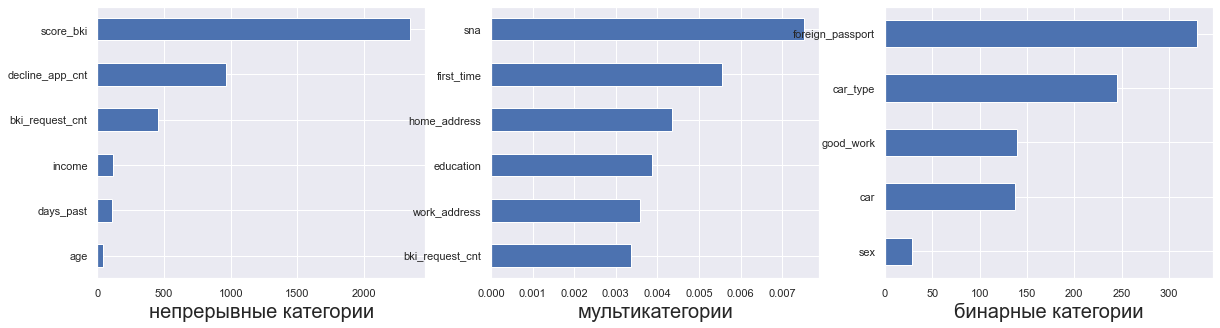

In [9]:
# оценка значимости  признаков
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# это количественные признаки (добавим в количественные новый признак 'days_past')
num_columns.append('days_past')
imp_num = pd.Series(f_classif(bank_set[num_columns], bank_set['default'])[0], index = num_columns)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh', ax=ax1)
ax1.set_xlabel('непрерывные категории', fontsize=20)

# это мультикатегории
bank_set = bin_labeling(bank_set, cat_columns)
imp_cat = pd.Series(mutual_info_classif(bank_set[cat_columns], bank_set['default'],
                                     discrete_features =True), index = cat_columns)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh', ax=ax2)
ax2.set_xlabel('мультикатегории', fontsize=20)

# это бинарные категории
bank_set = bin_labeling(bank_set, bin_columns)
imp_bin = pd.Series(f_classif(bank_set[bin_columns], bank_set['default'])[0], index = bin_columns)
imp_bin.sort_values(inplace = True)
imp_bin.plot(kind = 'barh', ax=ax3)
ax3.set_xlabel('бинарные категории', fontsize=20)
plt.show()

In [12]:
# заполняем пустые в education
education_dict = {'SCH': 1, 'UGR': 2, 'GRD':3, 'PGR':4, 'ACD':5}
bank_set.replace({'education': education_dict}, inplace=True)

for item in bank_set[bank_set['education'].isna()].index:
    if bank_set.loc[item, 'income'] > 80000:
        bank_set.loc[item, 'education'] = 5
    elif bank_set.loc[item, 'income'] > 70000:
        bank_set.loc[item, 'education'] = 4
    elif bank_set.loc[item, 'income'] > 66000:
        bank_set.loc[item, 'education'] = 3
    elif bank_set.loc[item, 'income'] > 47000:
        bank_set.loc[item, 'education'] = 2
    else:
        bank_set.loc[item, 'education'] = 1

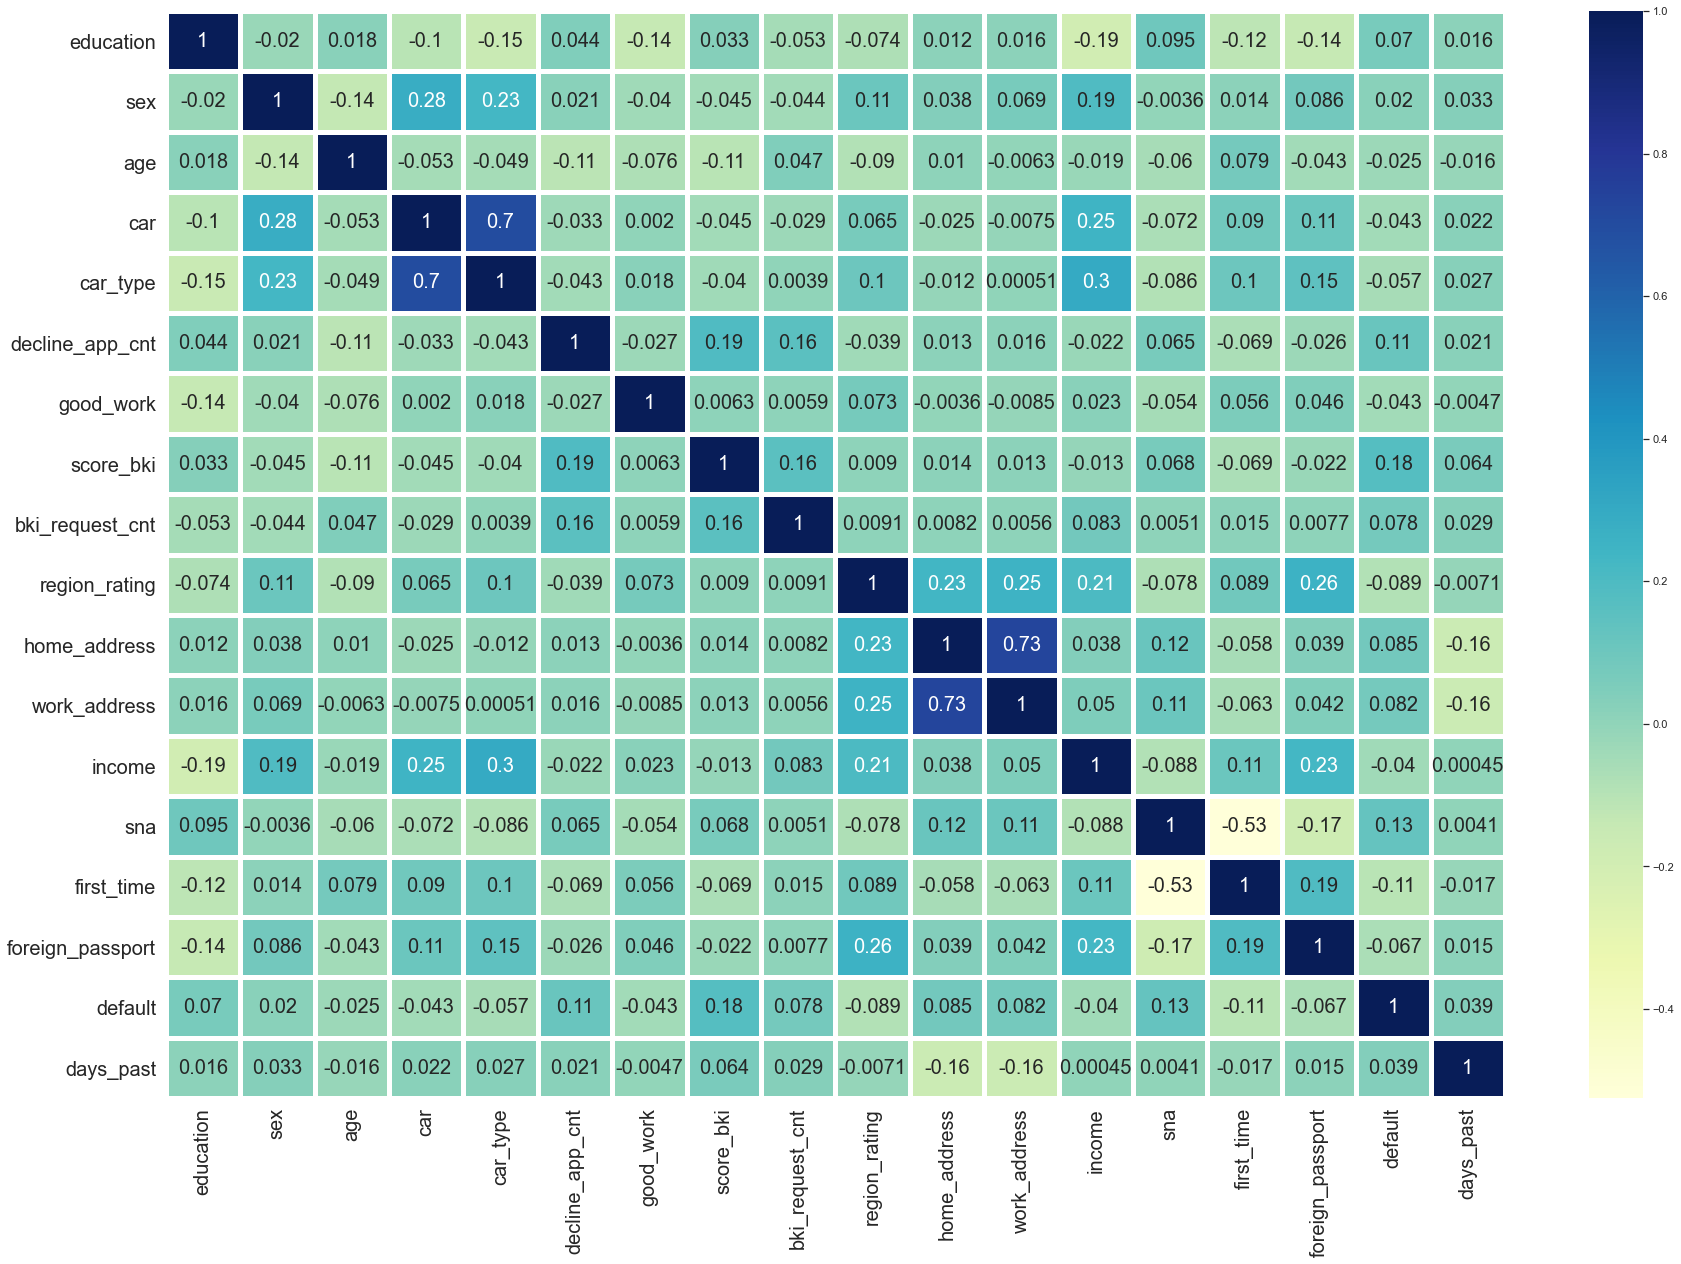

In [13]:
# посмотрим матрицу корреляции признаков
fig, ax = plt.subplots(figsize=(30,20)) 
sns.heatmap(bank_set.corr(method = 'pearson'),ax=ax, 
            annot=True, cmap='YlGnBu', 
            linewidths=5, annot_kws={"fontsize":20})
plt.yticks(rotation=0,fontsize = 20)
plt.xticks(rotation=90,fontsize = 20)
plt.show()